# 🧠TASK 6 - KNN Classification

In [1]:
# 📌 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

In [2]:
# 📌 Step 2: Load Dataset
df = pd.read_csv("/content/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Drop Id column
df.drop("Id", axis=1, inplace=True)

In [7]:
# 📌 Step 3: Encode Target Labels
df["Species"] = df["Species"].astype("category").cat.codes
# Mapping: setosa=0, versicolor=1, virginica=2

In [8]:
# 📌 Step 4: Prepare Features and Labels
X = df.drop("Species", axis=1)
y = df["Species"]

In [9]:
# 📌 Step 5: Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# 📌 Step 6: Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# 📌 Step 7: Try Different K values
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, preds))

In [12]:
# 📌 Step 8: Choose Best K
best_k = k_values[np.argmax(accuracies)]
print(f"Best K: {best_k}, Accuracy: {max(accuracies):.2f}")

Best K: 2, Accuracy: 1.00


In [13]:
# 📌 Step 9: Final Model
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
final_preds = final_model.predict(X_test)

In [14]:
# 📌 Step 10: Evaluation
print("Classification Report:\n", classification_report(y_test, final_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_preds))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


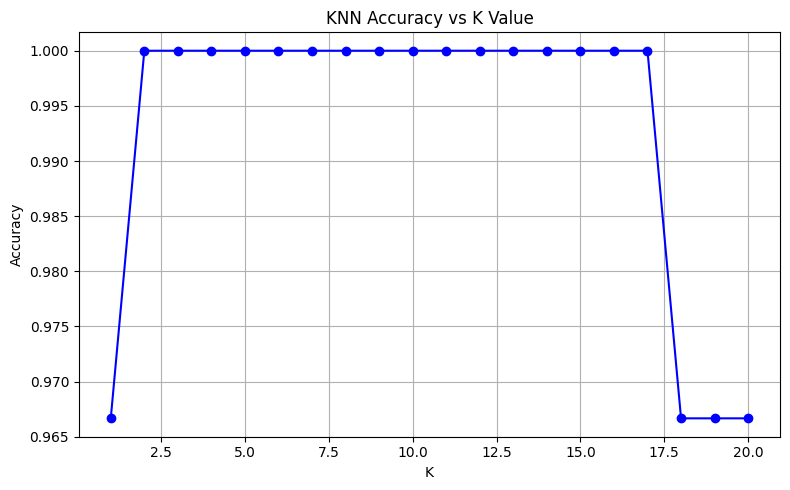

In [15]:
# 📌 Step 11: Plot Accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', color='blue')
plt.title("KNN Accuracy vs K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

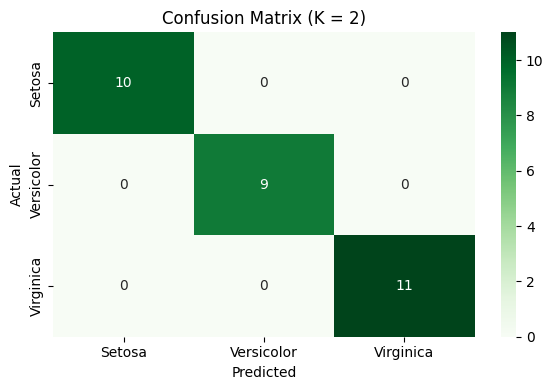

In [16]:
# 📌 Step 12: Confusion Matrix Plot
final_cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(final_cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Setosa", "Versicolor", "Virginica"],
            yticklabels=["Setosa", "Versicolor", "Virginica"])
plt.title(f"Confusion Matrix (K = {best_k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("knn_confusion_matrix.png")
plt.show()

## ✅ Summary of Results
- Best K Value: 2

- Accuracy: 100% (Perfect classification!)

- Precision, Recall, F1-Score: All 1.00 across classes